# Assignment 6 Clustering 


## Learning Objectives 

* Identify clustering learning algorithms 
* Identify what is K-means clustering and how it works
* Apply K-means to build data models
* Analyze and communicate analysis results by applying K-means to learn from data



# Code you can use in this assignment

In this assignment, you are expected to pratice K-means method to analyze data.  Below I copy functions and class definitions that are similar or identical to the code we covered in lecture so that you can use them in this assignment.  You are allowed to slightly update the code.  **You are required to use K-means algorithm based on the provided code as we learned in the lectures. If you use any other libries, your solutions will not get any points.** Feel free to use any other code from lecture.  

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
def minkowskiDist(v1, v2, p):
    #Assumes v1 and v2 are equal length arrays of numbers
    dist = 0
    for i in range(len(v1)):
        dist += abs(v1[i] - v2[i])**p
    return dist**(1/p)

In [3]:
class Example(object):
    
    def __init__(self, f1, f2, label = 0):
        #Assumes features is an array of floats
        self.f1 = f1
        self.f2 = f2
        self.features = [f1, f2]
        self.label = label
     
    def dimensionality(self):
        return len(self.features)
    
    def getFeatures(self):
        return self.features[:]
    
    def getLabel(self):
        return self.label
      
    def setLabel(self, label):
        self.label = label
    
    
    def distance(self, other):
        return minkowskiDist(self.features, other.getFeatures(), 1)
        #return minkowskiDist(self.features, other.getFeatures(), 2)
    
    def __str__(self):
        return str(self.features) + ':'\
               + str(self.label)

In [4]:


class Cluster(object):
    
    def __init__(self, examples):
        """Assumes examples a non-empty list of Examples"""
        self.examples = examples
        self.centroid = self.computeCentroid()
        
    def update(self, examples):
        """Assume examples is a non-empty list of Examples
           Replace examples; return amount centroid has changed"""
        oldCentroid = self.centroid
        self.examples = examples
        self.centroid = self.computeCentroid()
        return oldCentroid.distance(self.centroid)
    
    def computeCentroid(self):
        vals = np.array([0.0]*self.examples[0].dimensionality())
        for e in self.examples: #compute mean
            vals += e.getFeatures()
        centroid = Example(vals[0]/len(self.examples), vals[1]/len(self.examples))
        return centroid

    def getCentroid(self):
        return self.centroid

    def variability(self):
        totDist = 0
        for e in self.examples:
            totDist += (e.distance(self.centroid))**2
        return totDist
        
    def members(self):
        for e in self.examples:
            yield e

    def __str__(self):
        locs = []
        for e in self.examples:
            locs.append(e.getFeatures())
        return str(locs)
      

In [5]:
def kmeans(examples, k, verbose = False):
    #Get k randomly chosen initial centroids, create cluster for each
    initialCentroids = random.sample(examples, k)
    clusters = []
    for e in initialCentroids:
        clusters.append(Cluster([e]))
        
    #Iterate until centroids do not change
    converged = False
    numIterations = 0
    while not converged:
        numIterations += 1
        #Create a list containing k distinct empty lists
        newClusters = []
        for i in range(k):
            newClusters.append([])
            
        #Associate each example with closest centroid
        for e in examples:
            #Find the centroid closest to e
            smallestDistance = e.distance(clusters[0].getCentroid())
            index = 0
            for i in range(1, k):
                distance = e.distance(clusters[i].getCentroid())
                if distance < smallestDistance:
                    smallestDistance = distance
                    index = i
            #Add e to the list of examples for appropriate cluster
            newClusters[index].append(e)
            
        for c in newClusters: #Avoid having empty clusters
            if len(c) == 0:
                raise ValueError('Empty Cluster')
        
        #Update each cluster; check if a centroid has changed
        converged = True
        for i in range(k):
            if clusters[i].update(newClusters[i]) > 0.0:
                converged = False
        if verbose:
            print('Iteration #' + str(numIterations))
            for c in clusters:
                print(c)
            print('') #add blank line
            
    return clusters


# Meet-ups

Assume that we want to celebrate our accomplishments on data analysis and visualization.  In the following three problems, you need to organize several in-person meet-ups for your hometown classmates.   You know the locations of all your local classmates, which are specified as a list of inner lists in the below code cell.  Each inner list is a pair as 

$[x,y]$ 

where $x$ stands for the number of blocks east of your home city center and $y$ stands for the number of blocks north of the city center. 

That is, if x = -14, the location is located 14 blocks west of the home city; if y = 13, the location is located 13 blocks north of the home city.  If [x,y] is [-14, -5], which is the first location on the below list, it means the location is 14 blocks west and 5 blocks south of the home city center.    

You need to group the local classmates appropriately and choose meet-up locations for everyone to attend conveniently. 

In [6]:
#do not change the blow statement
inputs = [[-14,-5],[13,13],[20,23],[-19,-11],[-9,-16],[21,27],[-49,15],[26,13],[-46,5],[-34,-1],[11,15],[-49,0],[-22,-16],[19,28],[-12,-8],[-13,-19],[-41,8],[-11,-6],[-25,-9],[-18,-3]]


## Problem 1: Plotting the Locations 

For this problem, you need to plot the locations of your local classmates so that your classmates' locations could be visualized easily.   

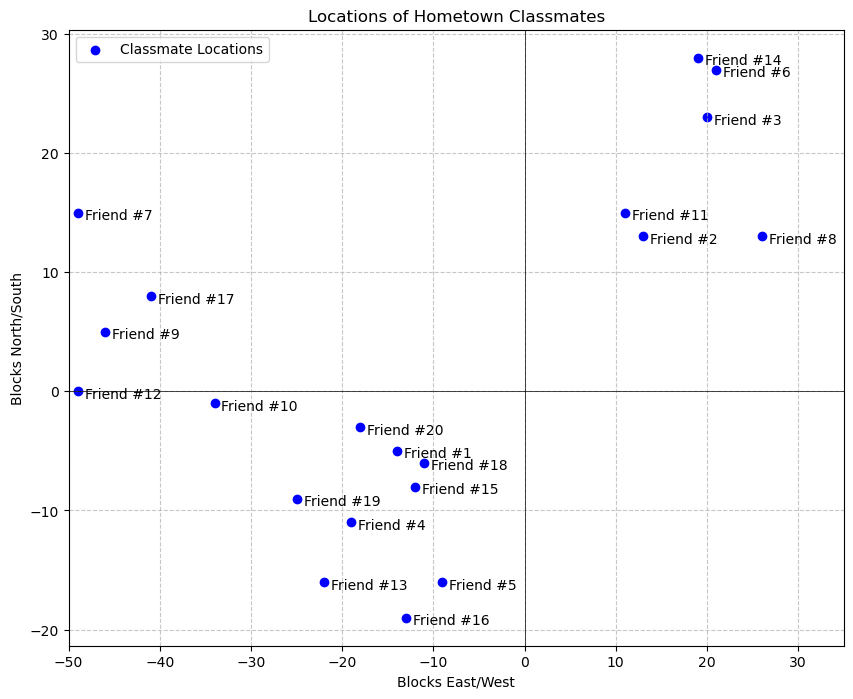

In [24]:
examples = [Example(location[0], location[1]) for location in inputs]

def plot_locations(data):
    plt.figure(figsize=(10, 8))
    x_vals = [loc[0] for loc in data]
    y_vals = [loc[1] for loc in data]
    plt.scatter(x_vals, y_vals, color="blue", label="Classmate Locations")
    for i, loc in enumerate(data):
        plt.annotate(f"Friend #{i+1}", (loc[0], loc[1]), textcoords="offset points", xytext=(5, -5), fontsize=10)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.xlim(-50, 35)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.title("Locations of Hometown Classmates")
    plt.xlabel("Blocks East/West")
    plt.ylabel("Blocks North/South")
    plt.legend()
    plt.show()

plot_locations(inputs)

## Problem 2: Clustering the Locations 
Imagine first we have enough budget for **three** meet-ups. You need to address below:
* Plot your clusters for the three meet-ups using different colors. 
* What locations would you choose for the meet-ups?

Later, assume that we are informed we only have enough budget for two meet-ups.  You need to create **two** clusters. You need to address below:
* Plot the two clusters again using different colors.  
* What locations would you choose for the meet-ups?


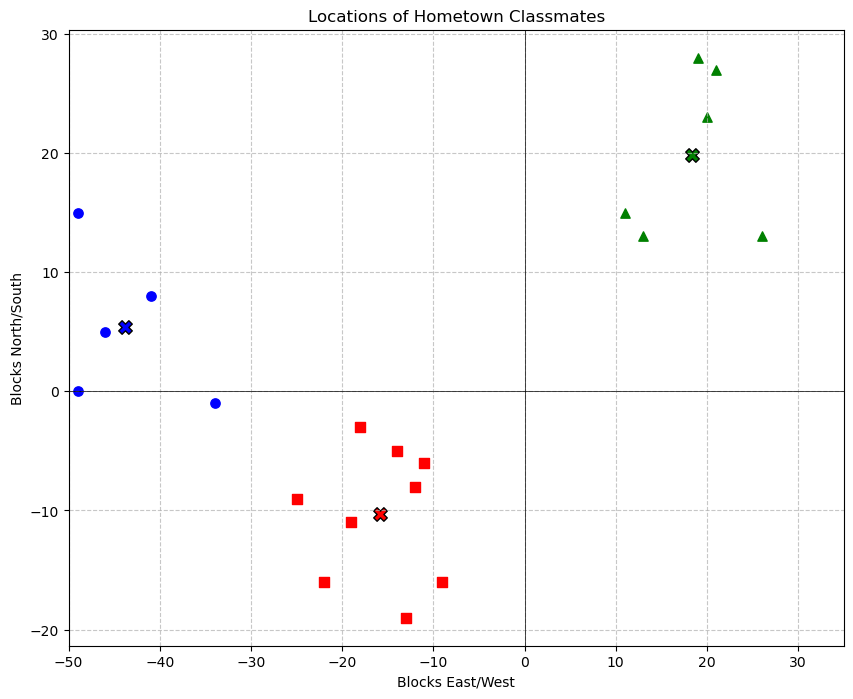

Locations for 3 meet-ups:
Meet-up 1: [-43.8, 5.4]
Meet-up 2: [18.33, 19.83]
Meet-up 3: [-15.89, -10.33]


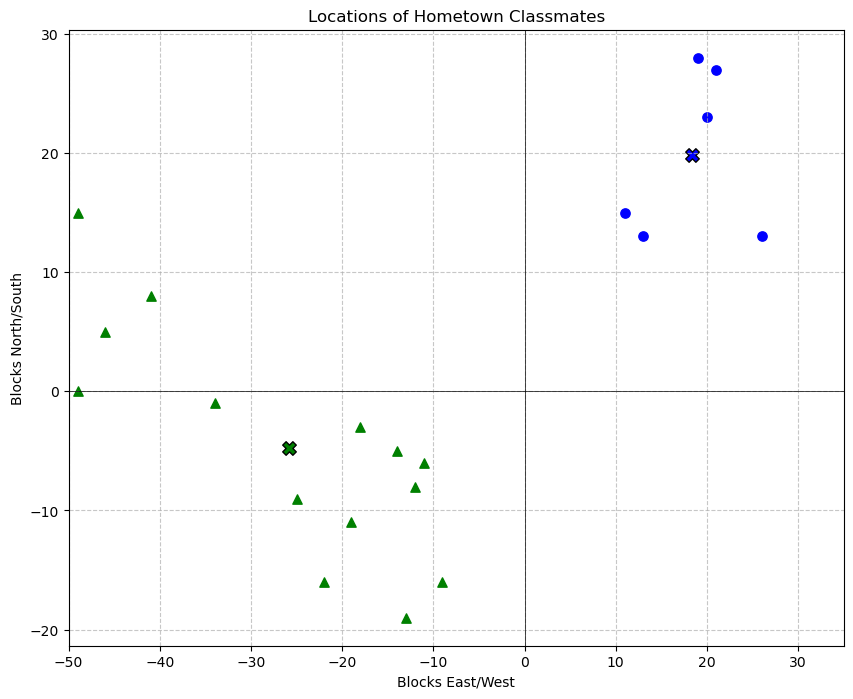

Locations for 2 meet-ups:
Meet-up 1: [18.33, 19.83]
Meet-up 2: [-25.86, -4.71]


In [52]:
# Function to plot the clusters
def plot_clusters(clusters, k, title):
    plt.figure(figsize=(10, 8))
    colors = ['b', 'g', 'r', 'c', 'm', 'y']
    markers = ['o', '^', 's', 'x', '*', '+']
    for i, cluster in enumerate(clusters):
        for member in cluster.examples:
            plt.scatter(member.features[0], member.features[1],
                        color=colors[i % len(colors)],
                        marker=markers[i % len(markers)],
                        s=45)
            
        # Plot centroids
        centroid = cluster.getCentroid()
        plt.scatter(centroid.features[0], centroid.features[1], 
                    color=colors[i % len(colors)], 
                    marker='X', s=95, edgecolor='black')
    
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.xlim(-50, 35)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.title("Locations of Hometown Classmates")
    plt.xlabel("Blocks East/West")
    plt.ylabel("Blocks North/South")
    plt.show()

# Clustering for 3 meet-ups
clusters_3 = kmeans(locations, 3)
plot_clusters(clusters_3, 3, "3 Meet-Ups")
print("Locations for 3 meet-ups:")
for i, cluster in enumerate(clusters_3):
    centroid = cluster.getCentroid()
    rounded_centroid = [round(float(val), 2) for val in centroid.features]
    print(f"Meet-up {i+1}: {rounded_centroid}")

# Clustering for 2 meet-ups
clusters_2 = kmeans(locations, 2)
plot_clusters(clusters_2, 2, "2 Meet-Ups")
print("Locations for 2 meet-ups:")
for i, cluster in enumerate(clusters_2):
    centroid = cluster.getCentroid()
    rounded_centroid = [round(float(val), 2) for val in centroid.features]
    print(f"Meet-up {i+1}: {rounded_centroid}")

## Problem 3: Writeup

Answer the following question to evaluate the two results (3-clusters vs. 2-clusters).  

* How do you compare the two results? Which one is better?  And why?


The comparison between the 3-cluster and 2-cluster results depends on the priorities of convenience and cost. With the 3-cluster approach, the locations are divided into three groups, resulting in nearer meet-up points for participants. This minimizes the travel distance that individuals need to take within each cluster. However, this also means a higher overall cost due to the need for organizing three separate meet-ups. On the other hand, the 2-cluster solution reduces the number of meet-ups, which makes it more cost-efficient, but participants in larger clusters may need to travel further to reach the meet-up location.

In terms of which is better, it depends on whether minimizing travel or reducing costs is prioritized. If minimizing travel distance for participants is the main goal, the 3-cluster solution would be better since it ensures more convenient meet-up locations for everyone. However, if the primary concern is budget, the 2-cluster solution is more suitable because it reduces the number of meet-ups and thus the total cost.

# Group Customers
In the following three problems, you need to group customers based on their shopping features.   The data file (*shoppingdata.csv*) of this part of the assignment can be downloaded from D2L site with this assignment specification. You should explore the data in the file first before your approach the below problems. The dataset has five columns including *Annual Income* and *Spending Score*. In this assignment, you are quired to retrieve the last **two** of these five columns. You need to make use of the *Annual Income* (in thousands of dollars) and *Spending Score* (1-100) columns to build your data examples. The Spending Score column signifies how often a person spends money in a mall on a scale of 1 to 100 with 100 being the highest spender. 


## Problem 4: Plotting the Customers
For this problem, you need to plot the customers so that their *spending scores* and *annual incomes* could be visualized easily.  Note that you only need to visualize the customers' *spending scores* and *annual incomes* in the plot.  Hint: you can use a scatter plot to visualize the relationships between the two features. 

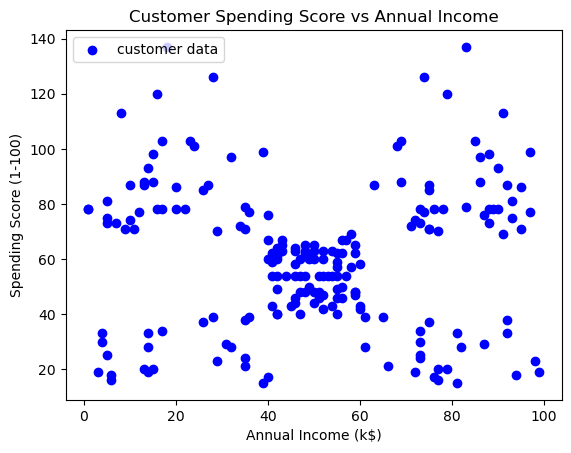

In [80]:
def getData(fileName):
    incomeList, spendingList = [], []
    with open(filename, 'r') as f:
        f.readline()
        for line in f:
            fields = line.strip().split(',')
            incomeList.append(float(fields[3]))
            spendingList.append(float(fields[4]))
    return (incomeList, spendingList)

def labelPlot():
    plt.title('Customer Spending Score vs Annual Income')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')

def plotData(fileName):
    yVals, xVals = getData(fileName)
    plt.scatter(xVals, yVals, marker='o', color='b', label = 'customer data')
    labelPlot()
    plt.legend(loc="upper left", frameon=True)
    plt.show()

plotData('shoppingdata.csv')

## Problem 5: Clustering the Customers

Cluster the customers into different groups using k-means clustering algorithm.  You need to decide what **k** value you would like to use in your final clustering result.  



In [83]:
# Define a class to represent customer points
class Customer:
    def __init__(self, id, features):
        self.id = id
        self.features = features

# Function to scale features to mean 0 and std 1
def scaleAttrs(vals):
    vals = np.array(vals)
    mean = sum(vals) / len(vals)
    sd = np.std(vals)
    vals = vals - mean
    return vals / sd

# Function to read data from the file and preprocess it
def getData(filename):
    incomeList, spendingList = [], []
    with open(filename, 'r') as f:
        f.readline()
        for line in f:
            fields = line.strip().split(',')
            incomeList.append(float(fields[3]))
            spendingList.append(float(fields[4]))

    # Build points
    points = []
    for i in range(len(incomeList)):
        features = np.array([incomeList[i], spendingList[i]])
        points.append(Customer('C' + str(i), features))
    return points

# Function to implement k-means clustering
def kMeans(points, k, numIterations=100):
    centroids = np.array([random.choice(points).features for _ in range(k)])
    prev_centroids = np.copy(centroids)
    labels = np.zeros(len(points), dtype=int)
    
    for _ in range(numIterations):
        # Assign points to nearest centroid
        for i, point in enumerate(points):
            distances = np.linalg.norm(point.features - centroids, axis=1)
            labels[i] = np.argmin(distances)
        
        # Recalculate centroids
        for j in range(k):
            cluster_points = np.array([points[i].features for i in range(len(points)) if labels[i] == j])
            if len(cluster_points) > 0:
                centroids[j] = np.mean(cluster_points, axis=0)
        
        # Check for convergence
        if np.allclose(centroids, prev_centroids, atol=1e-4):
            break
        prev_centroids = np.copy(centroids)
    
    clusters = {i: [] for i in range(k)}
    for i, label in enumerate(labels):
        clusters[label].append(points[i])
    return clusters

# Function to print cluster information
def printClustering(clustering):
    for cluster_id, members in clustering.items():
        numPoints = len(members)
        avgIncome = np.mean([m.features[0] for m in members])
        avgSpending = np.mean([m.features[1] for m in members])
        print(f"Cluster {cluster_id}: Size = {numPoints}, Avg Income = {round(avgIncome, 2)}, Avg Spending = {round(avgSpending, 2)}")

# Main function to run k-means clustering
def testClustering(filename, kValues):
    points = getData(filename)
    for k in kValues:
        print(f"\nTesting k-means with k = {k}")
        clustering = kMeans(points, k)
        printClustering(clustering)

# Run the test
filename = 'shoppingdata.csv'
testClustering(filename, kValues=[2, 4, 6])



Testing k-means with k = 2
Cluster 0: Size = 89, Avg Income = 61.19, Avg Spending = 73.47
Cluster 1: Size = 111, Avg Income = 60.05, Avg Spending = 31.54

Testing k-means with k = 4
Cluster 0: Size = 100, Avg Income = 48.26, Avg Spending = 56.48
Cluster 1: Size = 38, Avg Income = 87.0, Avg Spending = 18.63
Cluster 2: Size = 23, Avg Income = 26.3, Avg Spending = 20.91
Cluster 3: Size = 39, Avg Income = 86.54, Avg Spending = 82.13

Testing k-means with k = 6
Cluster 0: Size = 23, Avg Income = 26.3, Avg Spending = 20.91
Cluster 1: Size = 39, Avg Income = 86.54, Avg Spending = 82.13
Cluster 2: Size = 10, Avg Income = 109.7, Avg Spending = 22.0
Cluster 3: Size = 28, Avg Income = 78.89, Avg Spending = 17.43
Cluster 4: Size = 78, Avg Income = 54.62, Avg Spending = 50.03
Cluster 5: Size = 22, Avg Income = 25.73, Avg Spending = 79.36


Based on the output above the best k value would be k = 4 

## Problem 6: Writeup
How did you choose your **k** value in your final result?  And how do you evaluate your final result?  To addess this question, you need to reflect on your findings based on the analysis you did earlier when solving the other problems (e.g. problems 4 and 5). 


k = 4 seems to be the most appropriate choice because it provides a balanced segmentation for the dataset. For example, one cluster includes high-income, high-spending customers, while another contains high-income, low-spending individuals. This level of differentiation is more informative compared to k=2, which combines dissimilar groups into broader categories, making it less useful for detailed analysis. On the other hand, k = 6  introduces smaller clusters that are harder to interpret and may not offer significant insights for practical applications. The results for k=4 show reasonably balanced cluster sizes and clear distinctions in average income and spending, making it an ideal choice for understanding customer behavior and applying the findings to targeted marketing strategies.

# Turn-in

Turn in your notebook including your Python code and answers to the questions to D2L Assignments folder <b>Assignment 6</b>. Note that for your code cells in your document, you need to run them and save the output in your submitted notebook document.  